# Importing necessary libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# Reading data from a CSV file into a Pandas DataFrame

In [62]:
data=pd.read_csv("/content/drive/MyDrive/housing.csv")


In [63]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Total Beds has missing values


# Dropping rows with missing values from the DataFrame


In [65]:
data.dropna(inplace = True)

In [66]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [67]:
from sklearn.model_selection import train_test_split

# Separating features (x) and target variable (y)
x = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [68]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [69]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

# Splitting the data into training and testing sets

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# Creating a new DataFrame with training data

In [71]:
train_data = x_train.join(y_train)

In [72]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13230,-117.64,34.15,16.0,2896.0,404.0,1165.0,379.0,6.4559,INLAND,392900.0
7103,-118.00,33.89,34.0,1932.0,315.0,1053.0,316.0,5.1377,<1H OCEAN,213300.0
8581,-118.41,33.89,31.0,702.0,161.0,236.0,144.0,5.0497,<1H OCEAN,500001.0
7942,-118.13,33.87,45.0,1606.0,300.0,735.0,295.0,4.6765,<1H OCEAN,198400.0
9669,-119.30,38.26,19.0,3325.0,660.0,750.0,286.0,2.9509,INLAND,114800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

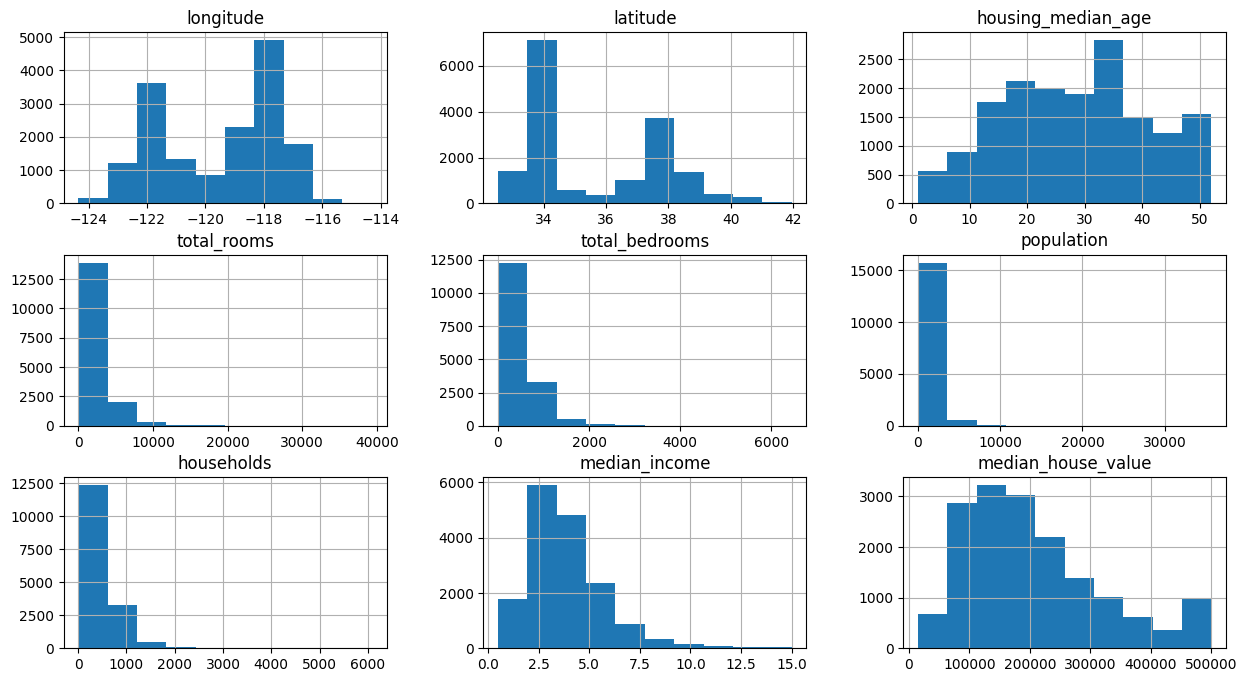

In [73]:
train_data.hist(figsize=(15,8))

In [74]:
import warnings
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

<Axes: >

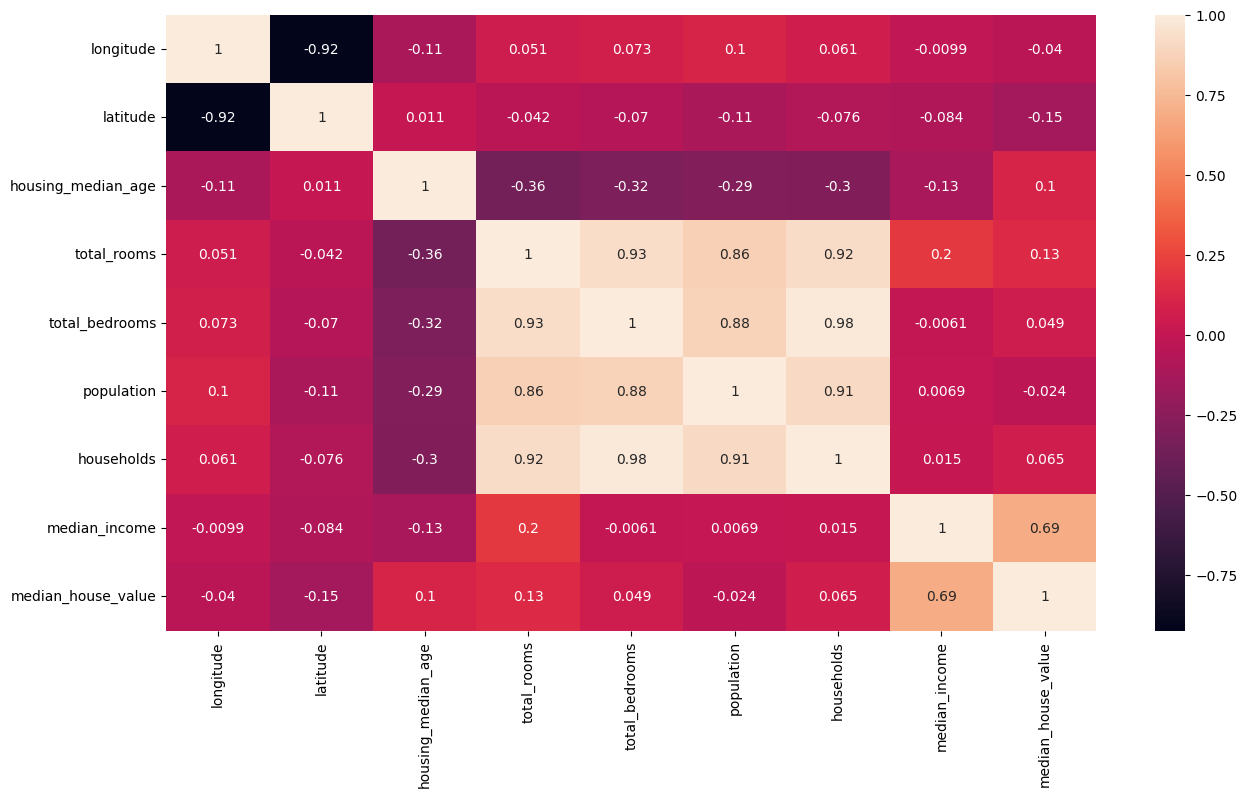

In [75]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)


# Applying log transformation to certain features in the training data

In [76]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] +1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

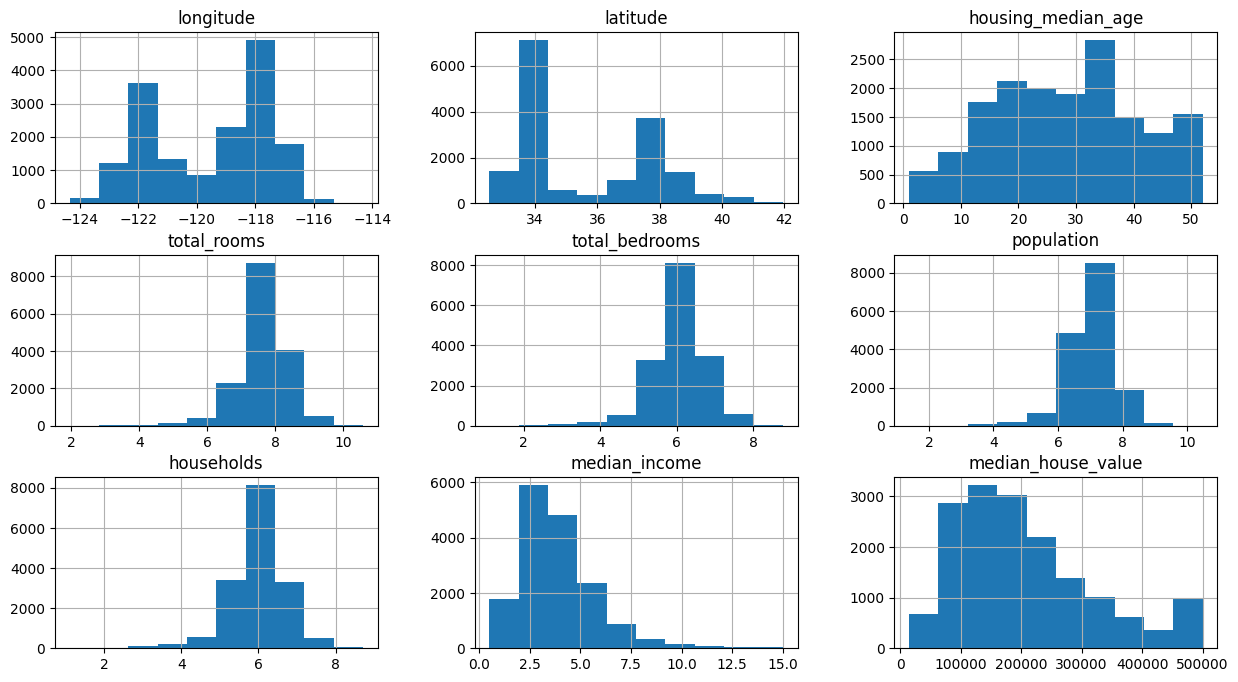

In [77]:
train_data.hist(figsize=(15,8))

In [78]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7231
INLAND        5191
NEAR OCEAN    2107
NEAR BAY      1813
ISLAND           4
Name: ocean_proximity, dtype: int64

# Creating dummy variables for the 'ocean_proximity' feature and joining them to the DataFrame

In [79]:
pd.get_dummies(train_data.ocean_proximity)


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13230,0,1,0,0,0
7103,1,0,0,0,0
8581,1,0,0,0,0
7942,1,0,0,0,0
9669,0,1,0,0,0
...,...,...,...,...,...
8911,1,0,0,0,0
20035,0,1,0,0,0
14563,0,0,0,0,1
9494,1,0,0,0,0


In [80]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis= 1)

# Creating a heatmap to visualize the correlation between features in the training data after modifications

<Axes: >

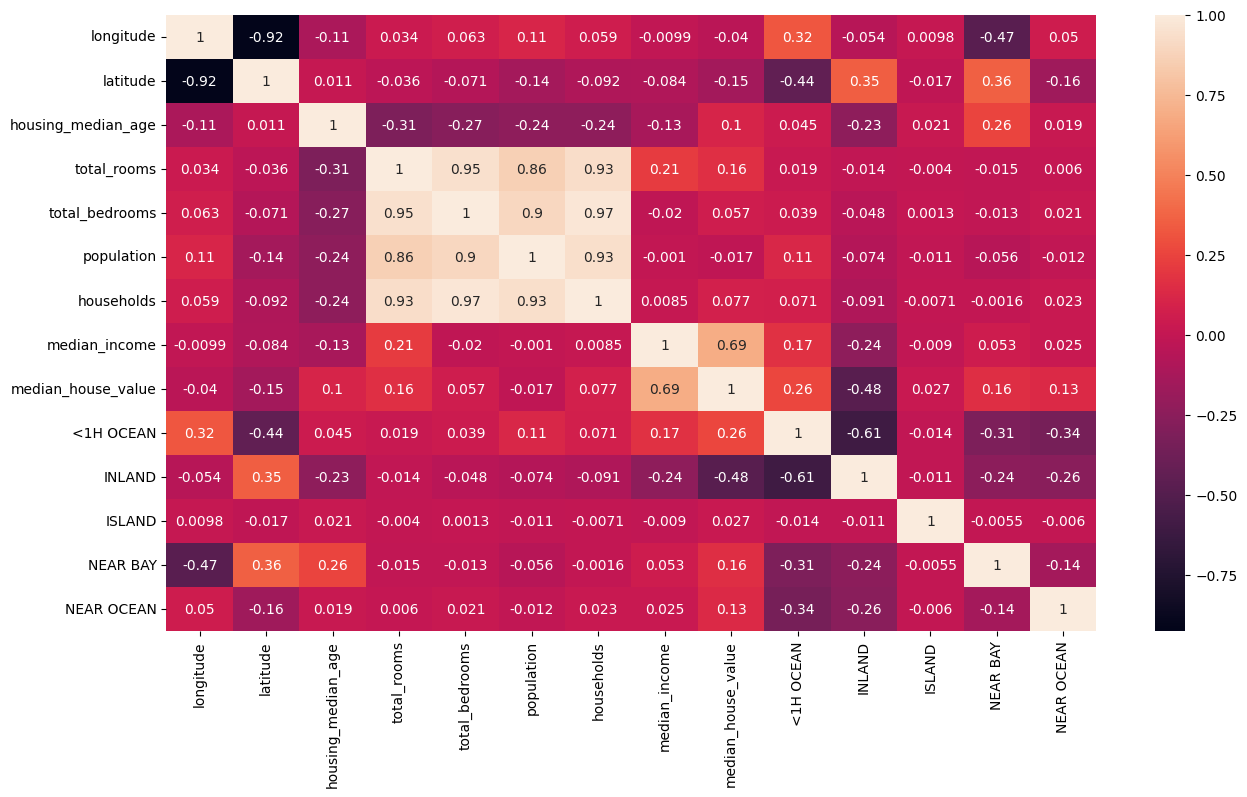

In [81]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

Living INLAND is negatic corelated

# Creating a scatter plot to visualize the relationship between latitude, longitude, and median house value


<Axes: xlabel='latitude', ylabel='longitude'>

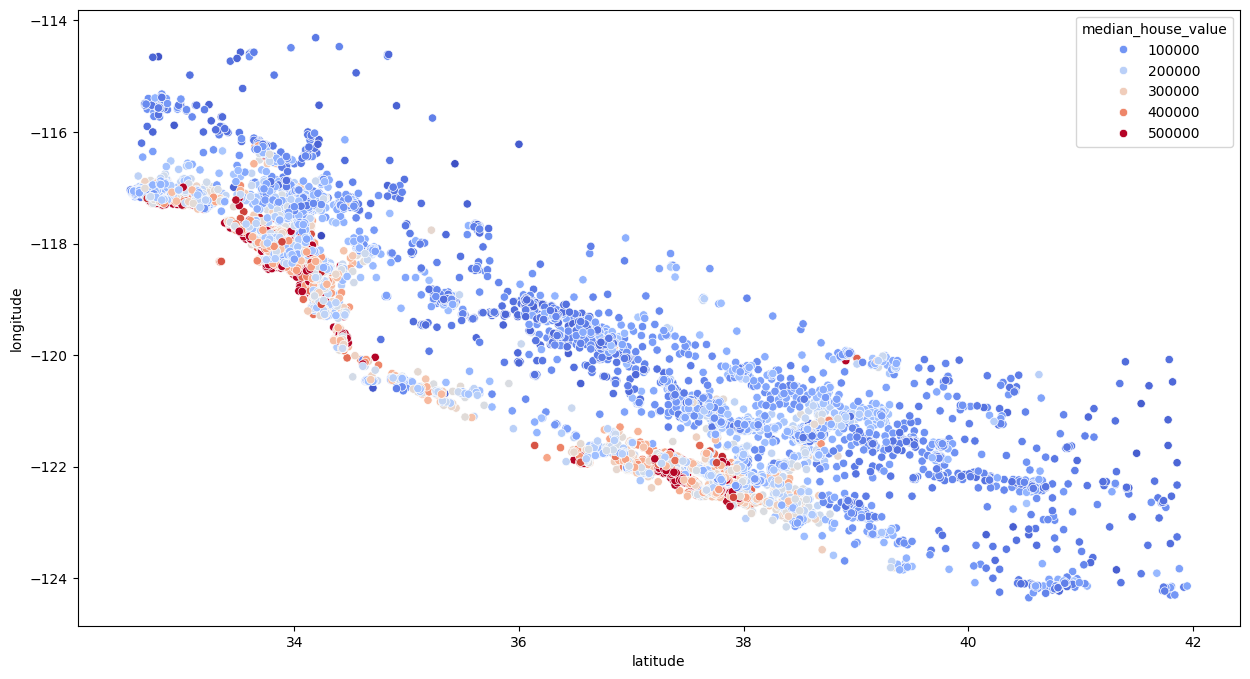

In [82]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y ='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

# Creating new features 'bedroom_ratio' and 'household_rooms' in the training data

In [83]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/ train_data['households']

# Creating a heatmap to visualize the correlation between features in the training data after adding new features


<Axes: >

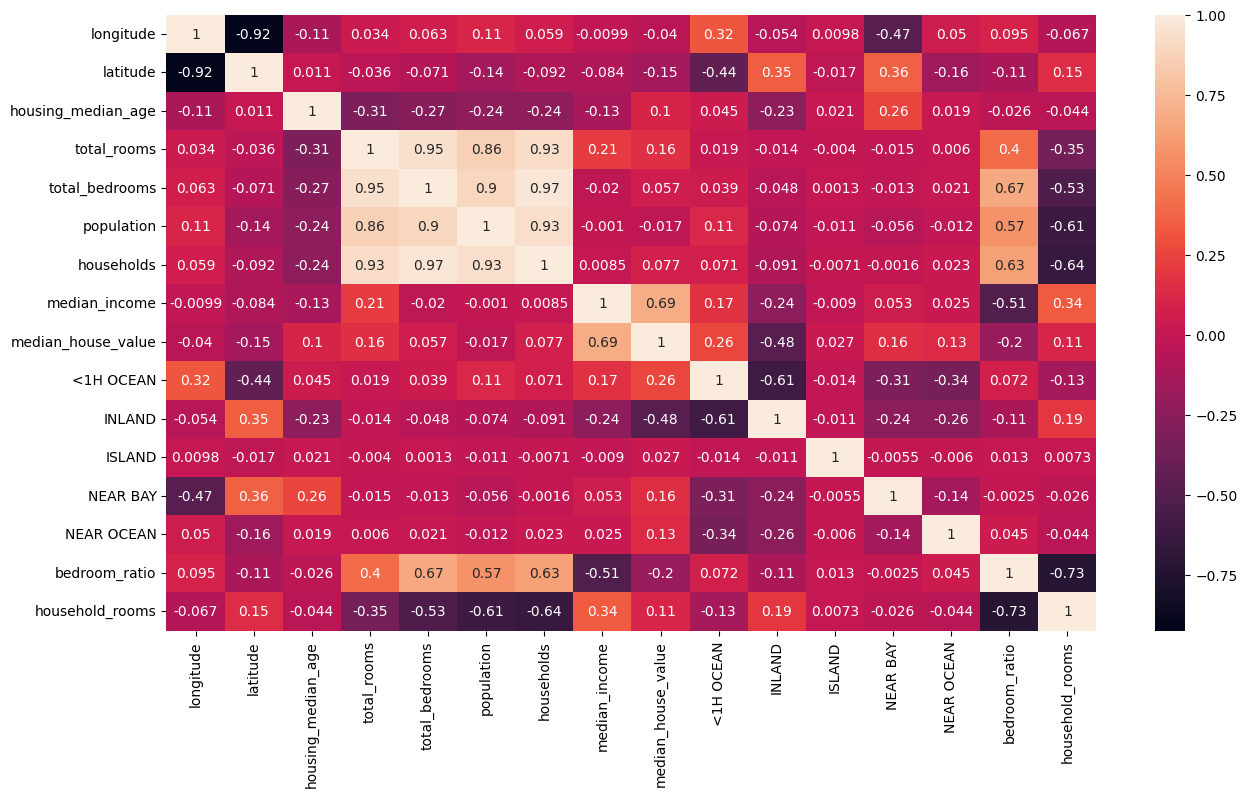

In [84]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)

# Scaling the features in the training data

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

# Creating a linear regression model and fitting it to the scaled training data
reg = LinearRegression()
reg.fit(x_train_s, y_train)


LinearRegression()

# Applying log transformation and other modifications to the testing data

In [93]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] +1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis= 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/ test_data['households']



In [94]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [95]:
x_test_s = scaler.transform(x_test)

# Calculating and displaying the R-squared score of the linear regression model on the testing data

In [96]:
reg.score(x_test_s, y_test)

0.6706439252774703

A R-squared score of 0.67 is a moderately good result. The R-squared value measures the proportion of the variance in the dependent variable (median house value in this case) that is predictable from the independent variables (features). Here's a brief interpretation:

An R-squared score of 0.67 means that the linear regression model explains approximately 67% of the variance in the median house values in the test data.

This indicates a moderately strong correlation between the features used in the model and the target variable.

While it's a decent score, there is still some unexplained variance, and the model may benefit from further refinement, feature engineering, or the use of more complex models.

It's always a good idea to compare this R-squared score with other models or benchmarks to assess its relative performance.

In summary, a score of 0.67 suggests that the linear regression model is capturing a substantial portion of the variability in the median house values but there is room for improvement.


In [100]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [102]:
forest.score(x_test_s, y_test)

0.8212520775913614

# Better score with random forest
